In [1]:
from yamlParseObjects.yamlObjects import * 
from yamlParseObjects.variablesUtil import *
import logging
import os,sys
import subprocess
import platform
import shutil
import numpy as np 
import matplotlib.pyplot as plt 
from enum import Enum
from sklearn import svm

simConfig = simulationConfig('./yamlFiles/adaptiveTesting.yaml')
for p in simConfig.codeBase: 
    sys.path.insert(0,p)
    print(p + ' is added to the path')

from geneticalgorithm import geneticalgorithm as ga
from ActiveLearning.benchmarks import Branin
from ActiveLearning.Sampling import *
from ActiveLearning.optimizationHelper import GeneticAlgorithmSolver as gaSolver

from plotter import *

import time
import numpy as np 

C:\Users\bm12m\Google Drive\codes\Codes is added to the path
C:\Users\bm12m\Google Drive\codes\testing is added to the path


In [2]:
variablesFiles = './yamlFiles/varAdaptTest.yaml'
variables = getAllVariableConfigs(yamlFileAddress=variablesFiles, scalingScheme=Scale.LINEAR)
budget = simConfig.sampleBudget # Number of sampels:
initialSampleSize = simConfig.initialSampleSize
batchSize = simConfig.batchSize

In [3]:
mySpace = Space(variableList = variables,initialSampleCount = initialSampleSize)
currentBudget = budget - initialSampleSize

# myBench = DistanceFromOrigin(threshold = 3, inputDim = 2, center = [5,5])
myBench = Hosaki()
# myBench = Branin(25)
mySpace.generateInitialSample()
mySpace.getBenchmarkLabels(myBench)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0])

In [4]:
mySpace.fit_classifier()
figFolder = simConfig.figFolder
sInfo = SaveInformation(fileName=f'{figFolder}/Initial_labeling', savePDF=False, savePNG=True)

In [5]:
acc = [mySpace.getAccuracyMeasure(percent = True)]

In [8]:
acc

[87.92]

In [6]:
epsilon = 0.05
def objFunction(X):
    dist = mySpace.nearestPointDistance(X)
    pen = 0
    df = mySpace.clf.decision_function(X.reshape(1,len(X)))
    if abs(df) > epsilon:
        pen = abs(df) * 100
    return -1 * dist + pen


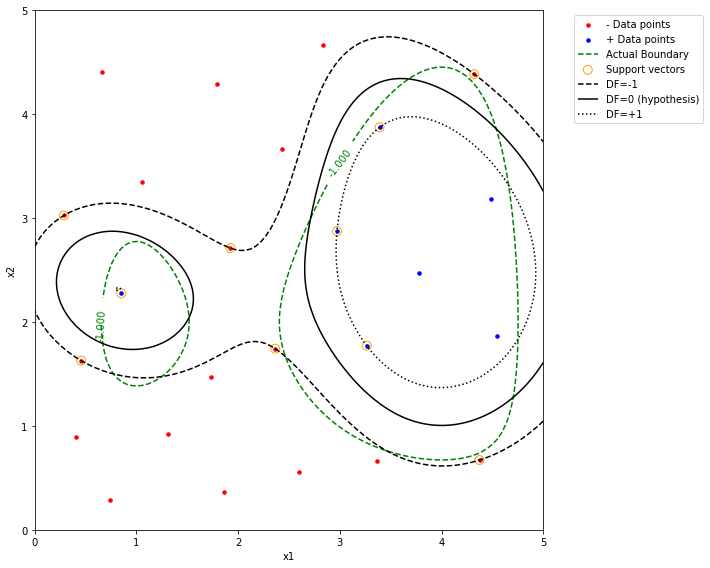

In [7]:
plotSpace(mySpace,figsize = (10,8), legend = True, saveInfo=sInfo, showPlot=True)

Hypothesis change estimate:  30.12 %
 The best solution found:                                                                           
 [1.54591245 2.20252647]

 Objective function:
 -0.634962033836779


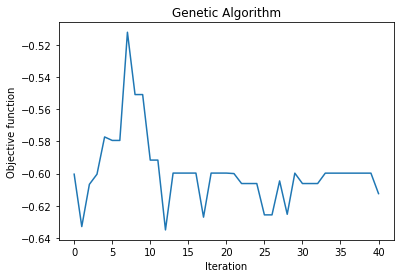

 The best solution found:                                                                           
 [2.68675372 2.29888391]

 Objective function:
 -0.6419560010812243


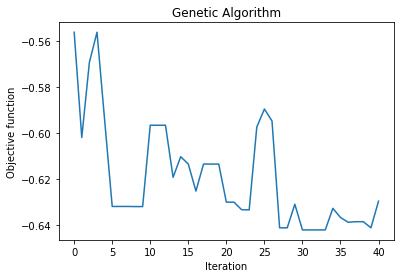

 The best solution found:                                                                           
 [4.69823721 1.26628179]

 Objective function:
 -0.6205794713603653


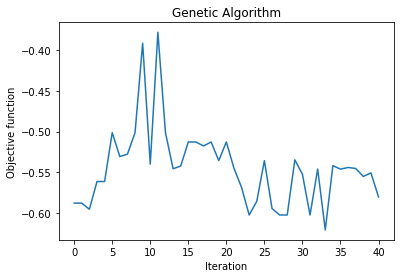

 The best solution found:                                                                           
 [1.08118654 1.73576469]

 Objective function:
 -0.5872972288247471


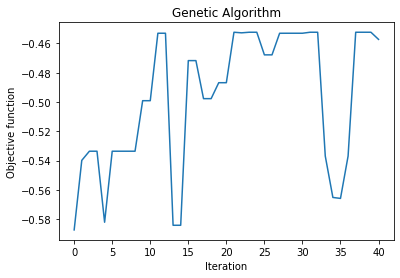

 The best solution found:                                                                           
 [0.20612899 2.37629402]

 Objective function:
 -0.652883573389315


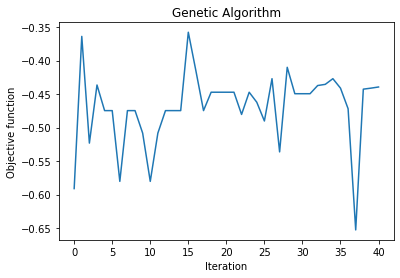

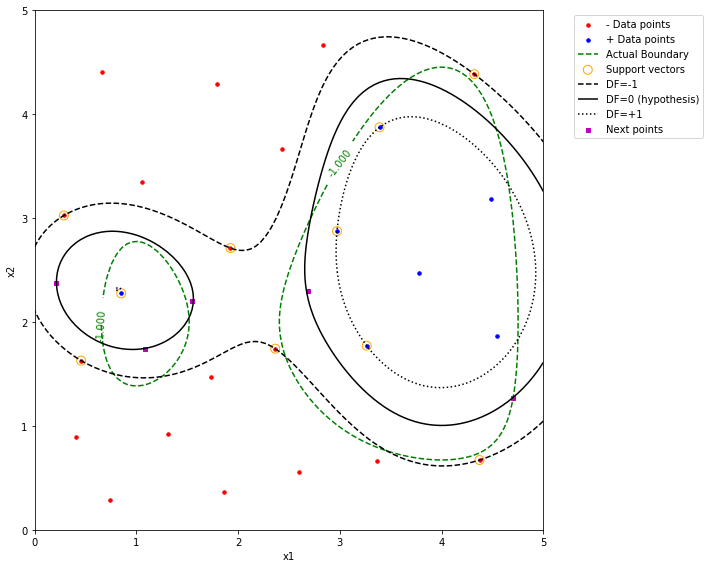

Hypothesis change estimate:  [7.359999999999999] %
Current Accuracy estimate:  [90.72] %


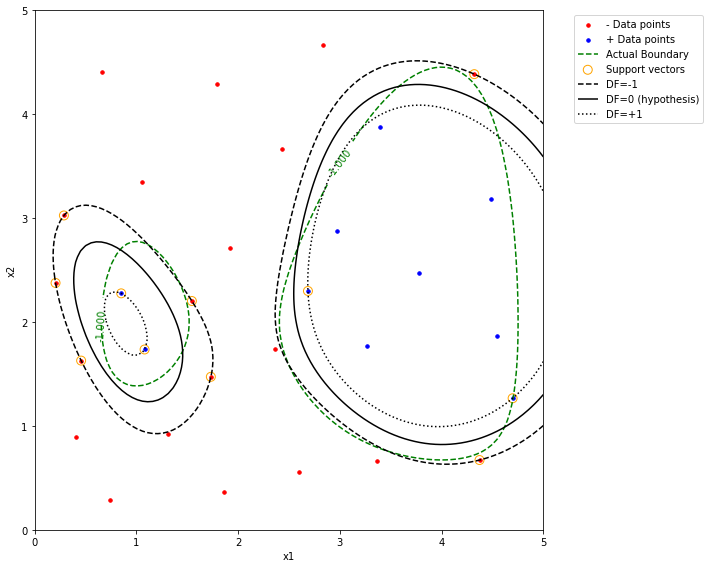

 The best solution found:                                                                           
 [4.69311642 3.90984116]

 Objective function:
 -0.6043961984920072


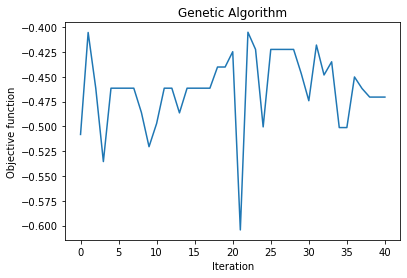

 The best solution found:                                                                           
 [3.04670331 1.21546552]

 Objective function:
 -0.5978243481519493


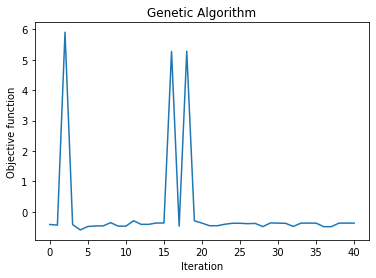

 The best solution found:                                                                           
 [2.71964093 3.28291095]

 Objective function:
 -0.47824668834698325


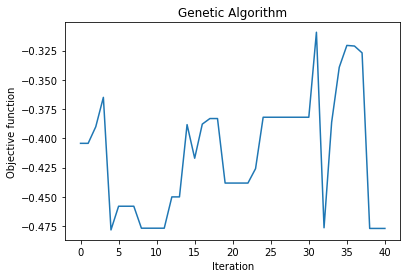

 The best solution found:                                                                           
 [0.95744904 1.26410312]

 Objective function:
 -0.48762239405757435


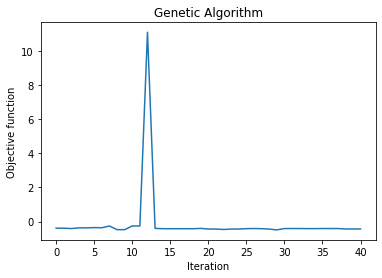

 The best solution found:                                                                           
 [0.65505166 2.76046979]

 Objective function:
 -0.4528045273486393


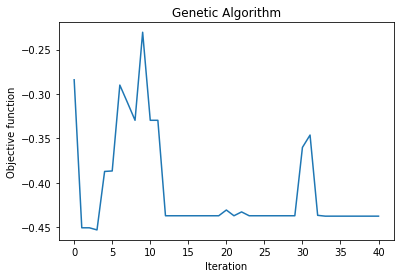

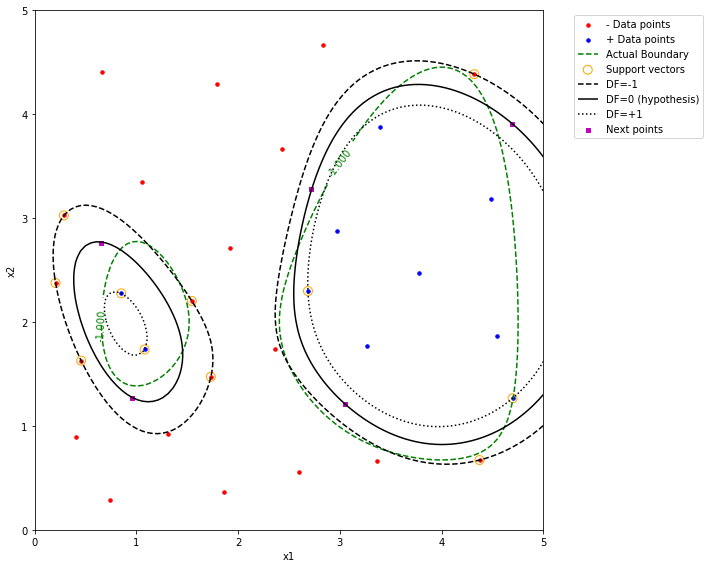

Hypothesis change estimate:  [4.24] %
Current Accuracy estimate:  [93.19999999999999] %


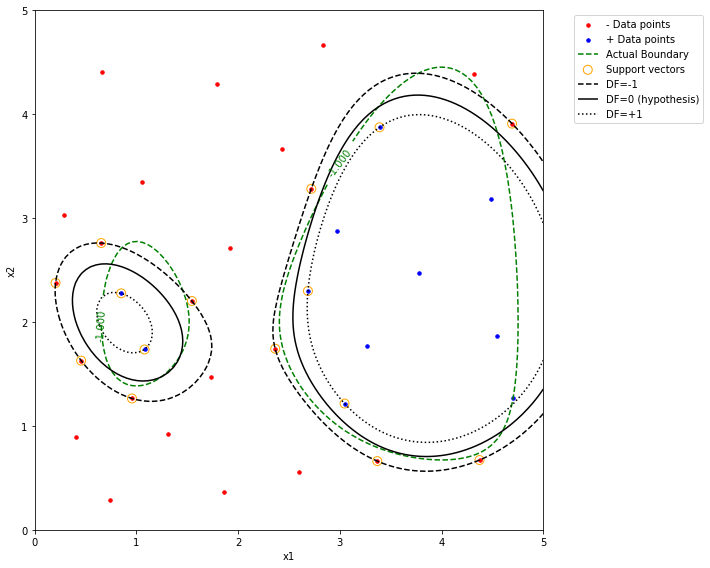

 The best solution found:                                                                           
 [4.9461057  3.34971457]

 Objective function:
 -0.4882164740353996


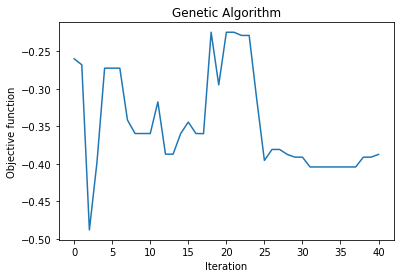

 The best solution found:                                                                           
 [3.8209132  4.19044656]

 Objective function:
 -0.533567393440001


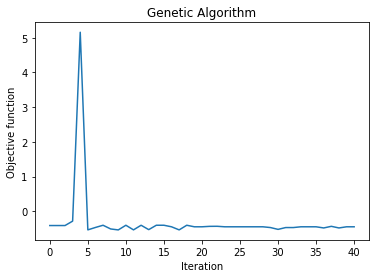

 The best solution found:                                                                           
 [3.00379063 3.64763063]

 Objective function:
 -0.4486821754376034


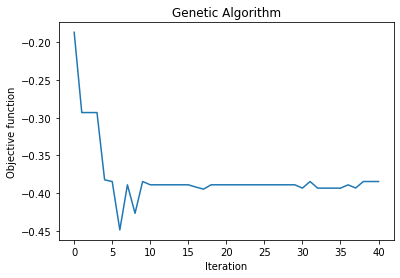

 The best solution found:                                                                           
 [3.89958662 0.7039583 ]

 Objective function:
 -0.47429766819262364


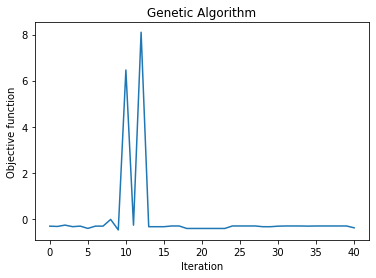

 The best solution found:                                                                           
 [2.72132316 1.40688669]

 Objective function:
 -0.37751067031887214


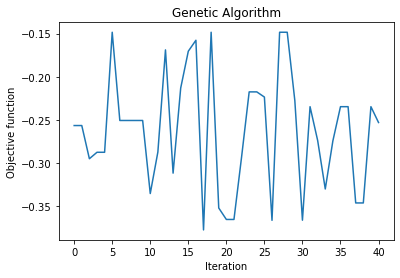

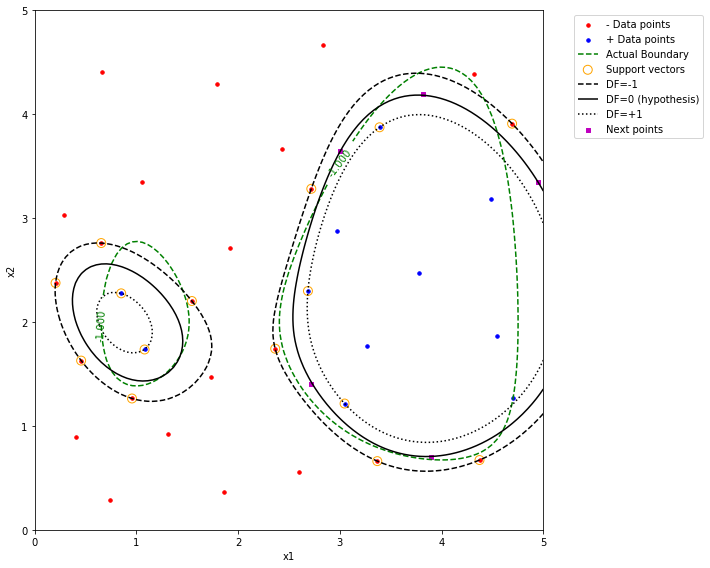

Hypothesis change estimate:  [3.0] %
Current Accuracy estimate:  [94.12] %


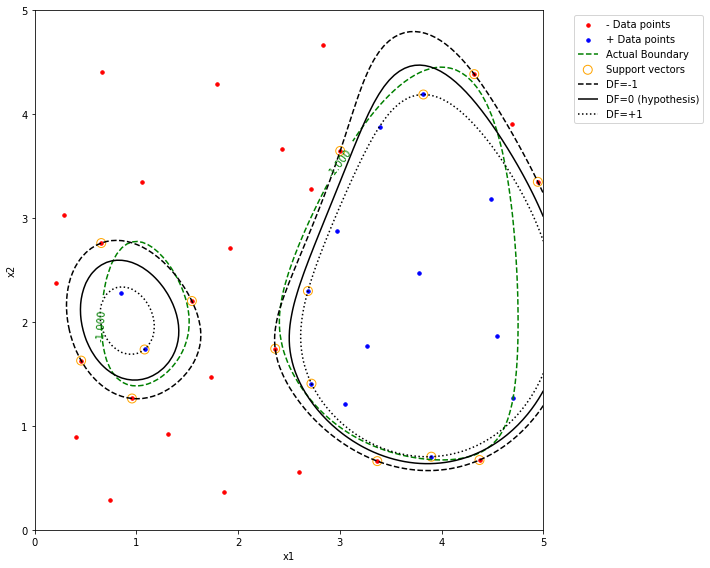

 The best solution found:                                                                           
 [0.45442069 2.05302656]

 Objective function:
 -0.40761577792801634


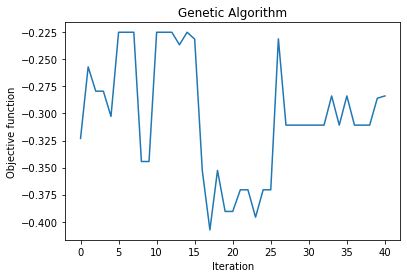

 The best solution found:                                                                           
 [3.43620314 4.25296359]

 Objective function:
 -0.3808174949626315


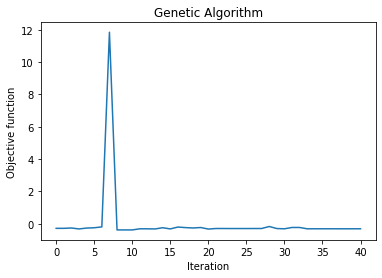

 The best solution found:                                                                           
 [1.42404608 1.86210264]

 Objective function:
 -0.3615795839909457


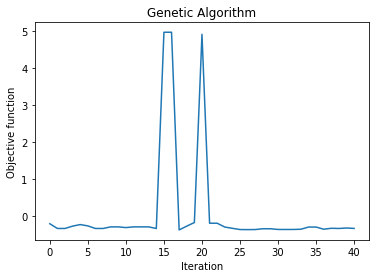

 The best solution found:                                                                           
 [0.53735735 2.42471316]

 Objective function:
 -0.33474862691865453


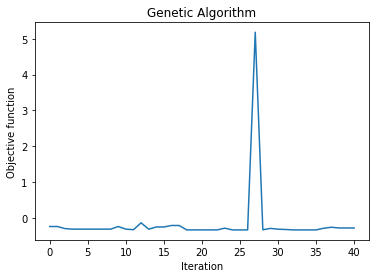

 The best solution found:                                                                           
 [1.23176526 2.37641822]

 Objective function:
 -0.3590637804311783


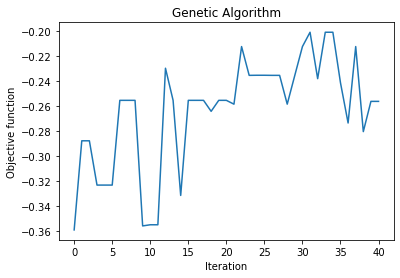

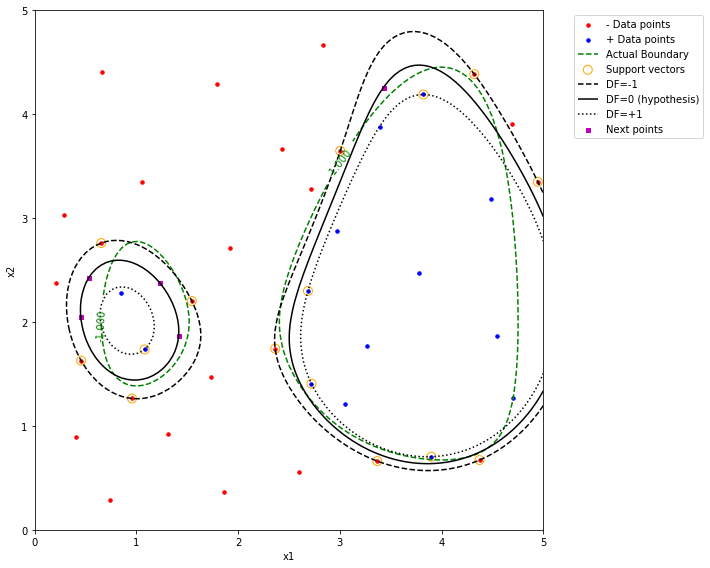

Hypothesis change estimate:  [2.88] %
Current Accuracy estimate:  [95.24000000000001] %


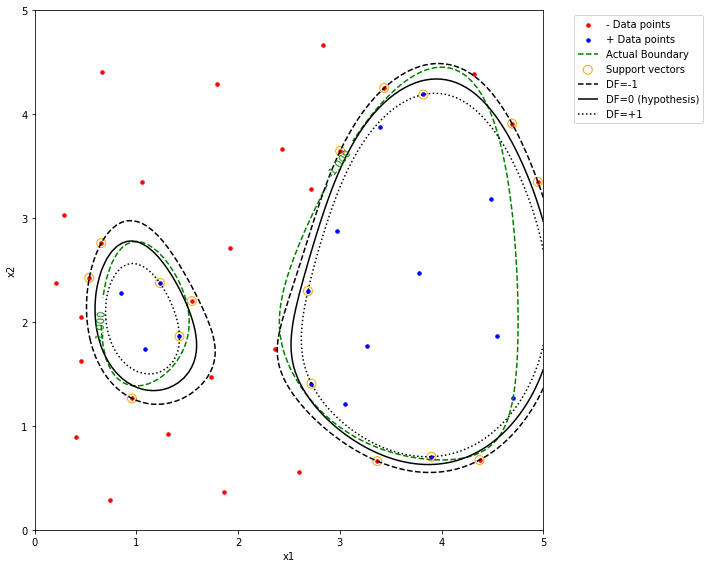

 The best solution found:                                                                           
 [1.0871158  2.74377659]

 Objective function:
 -0.394810887751214


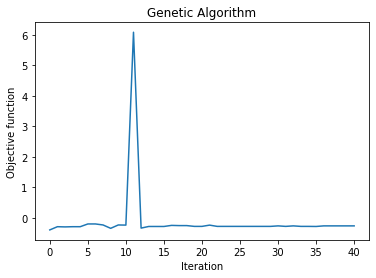

 The best solution found:                                                                           
 [0.77448255 1.55028153]

 Objective function:
 -0.32655993402525535


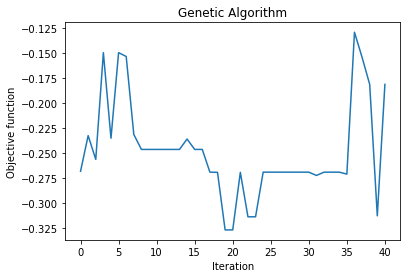

 The best solution found:                                                                           
 [4.98734737 1.52041976]

 Objective function:
 -0.38492959378842884


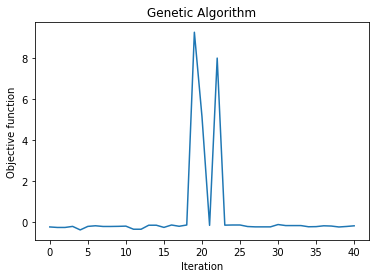

 The best solution found:                                                                           
 [1.3317078  1.37111169]

 Objective function:
 -0.3892562743912949


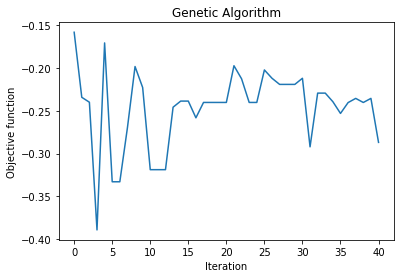

 The best solution found:                                                                           
 [4.64532595 0.97022411]

 Objective function:
 -0.300748651693702


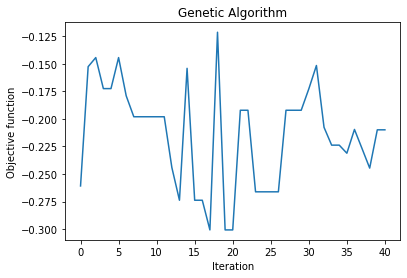

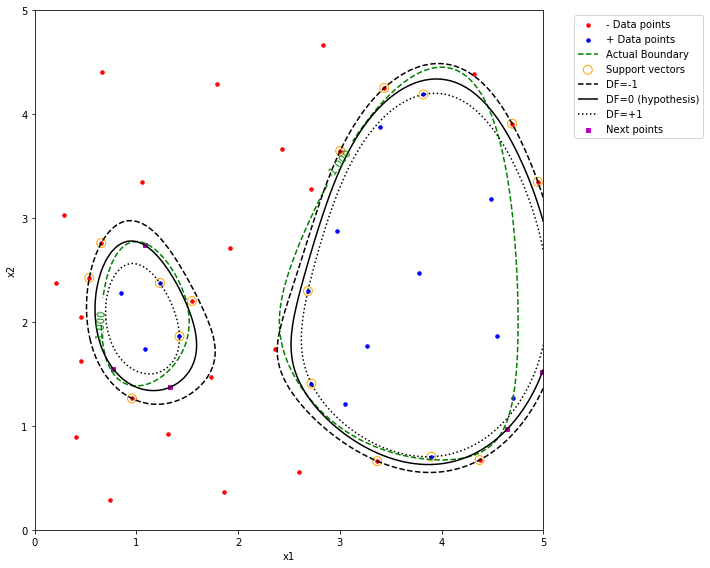

Hypothesis change estimate:  [2.52] %
Current Accuracy estimate:  [94.39999999999999] %


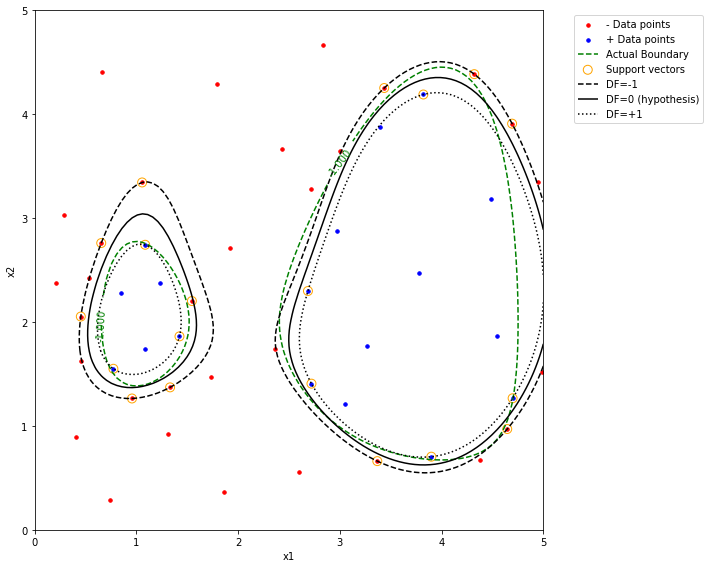

 The best solution found:                                                                           
 [4.98073978 2.9781485 ]

 Objective function:
 -0.3731767110125329


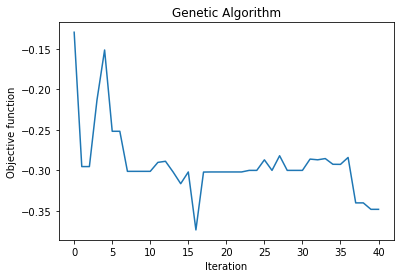

 The best solution found:                                                                           
 [3.10216208 0.89637892]

 Objective function:
 -0.3238702401520365


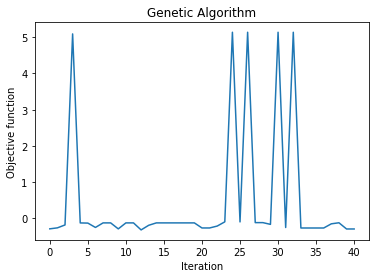

 The best solution found:                                                                           
 [1.01644629 3.04320581]

 Objective function:
 -0.303266301951558


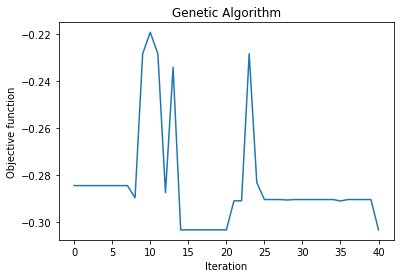

 The best solution found:                                                                           
 [2.70412843 2.59255131]

 Objective function:
 -0.294180941206218


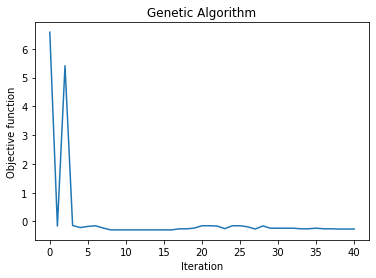

 The best solution found:                                                                           
 [1.32352552 2.79919725]

 Objective function:
 -0.2428188722497405


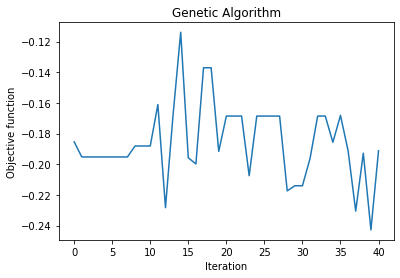

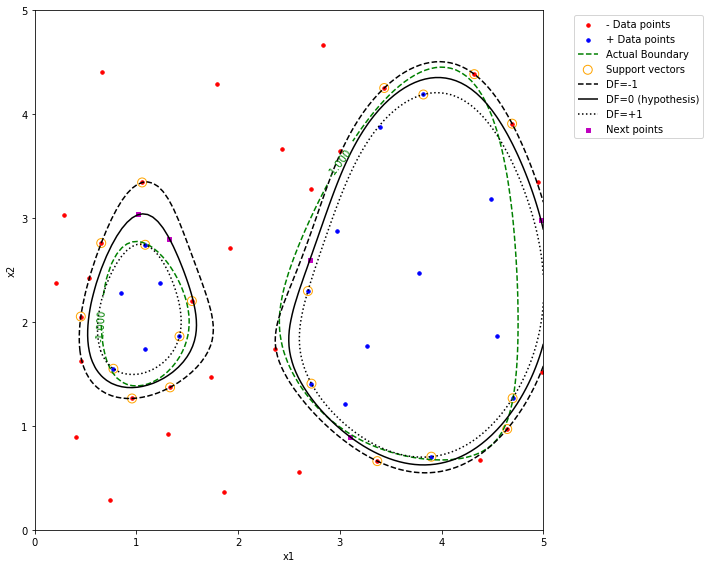

Hypothesis change estimate:  [2.16] %
Current Accuracy estimate:  [95.84] %


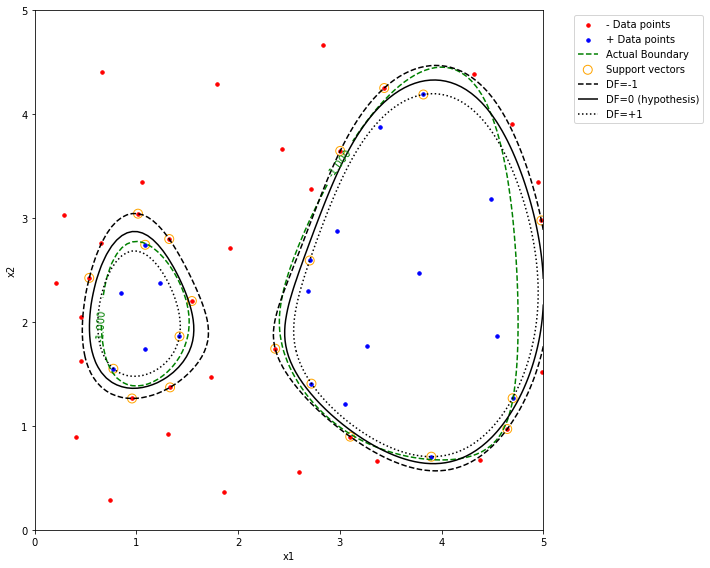

 The best solution found:                                                                           
 [1.46314466 1.61376822]

 Objective function:
 -0.2513934796028968


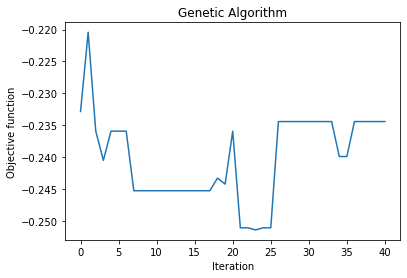

 The best solution found:                                                                           
 [4.06595765 4.30717618]

 Objective function:
 -0.2673745724857541


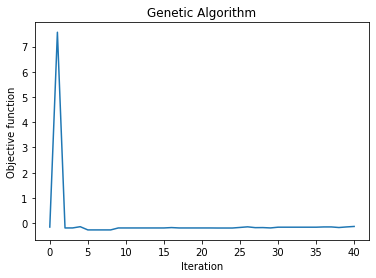

 The best solution found:                                                                           
 [4.98691445 2.01891813]

 Objective function:
 -0.46358572425843464


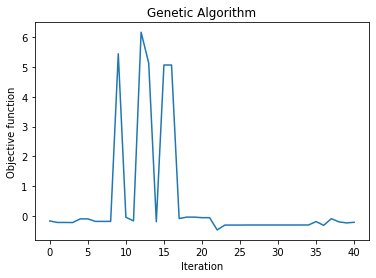

 The best solution found:                                                                           
 [2.46223808 1.99656653]

 Objective function:
 -0.2712228192017055


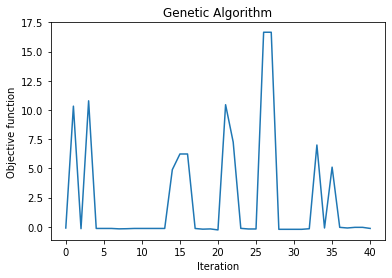

 The best solution found:                                                                           
 [2.72907335 2.83973226]

 Objective function:
 -0.24595764793707656


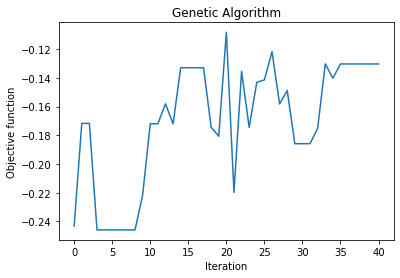

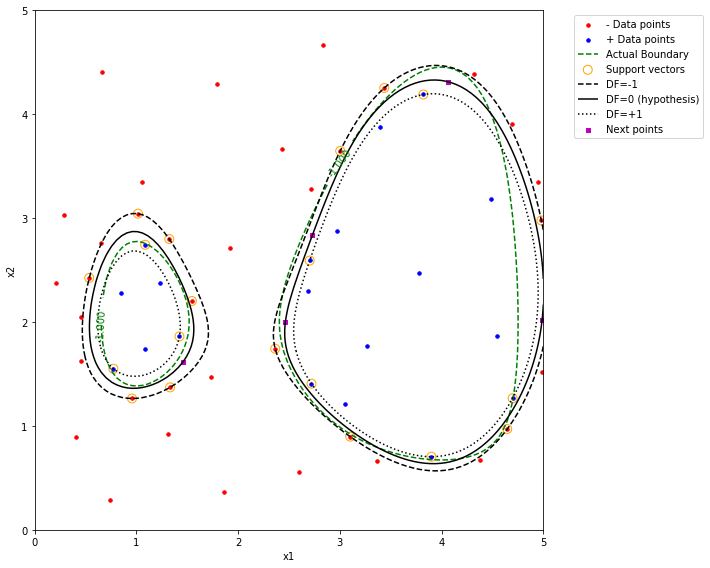

Hypothesis change estimate:  [2.12] %
Current Accuracy estimate:  [96.84] %


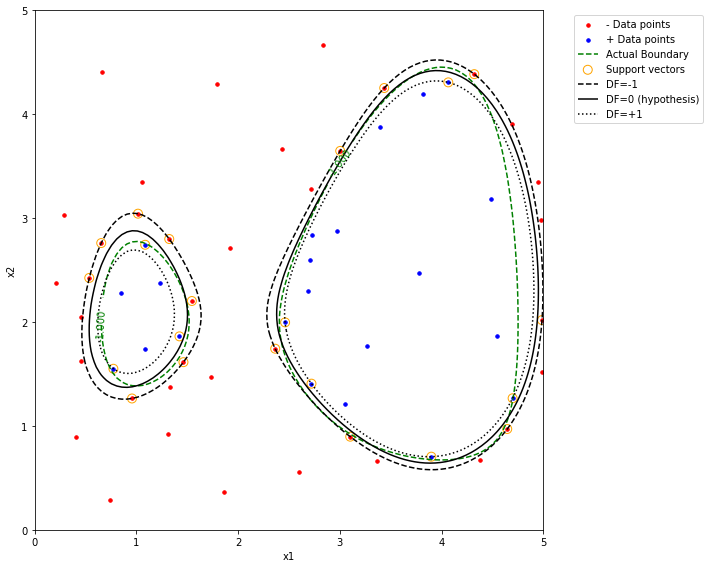

 The best solution found:                                                                           
 [4.94099305 2.56770966]

 Objective function:
 -0.4123588792717942


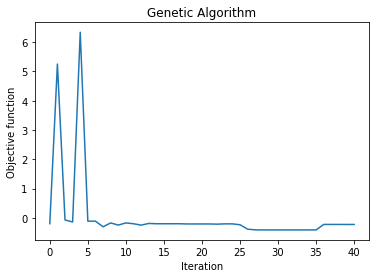

 The best solution found:                                                                           
 [4.90849882 1.75440735]

 Objective function:
 -0.24691554507603095


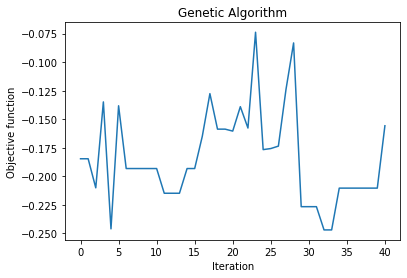

 The best solution found:                                                                           
 [4.47287905 4.12666756]

 Objective function:
 -0.30067861574960786


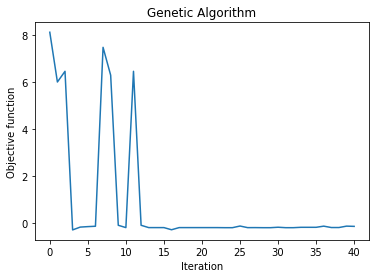

 The best solution found:                                                                           
 [2.54402083 1.57259955]

 Objective function:
 -0.2426867672699894


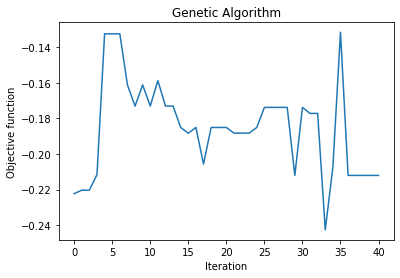

 The best solution found:                                                                           
 [4.95099235 2.32087578]

 Objective function:
 -0.24703633330357552


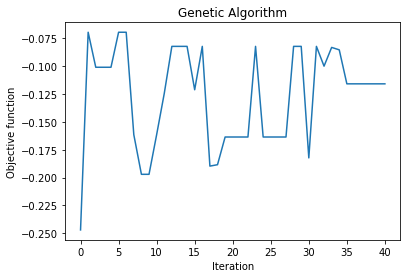

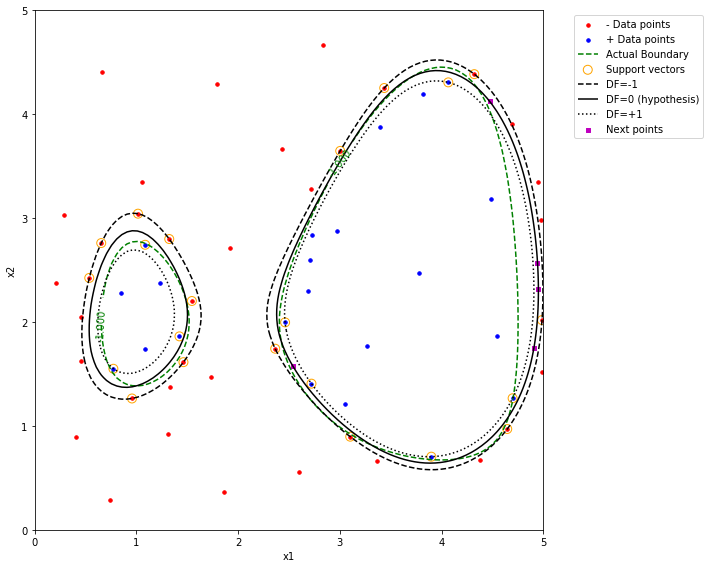

Hypothesis change estimate:  [1.68] %
Current Accuracy estimate:  [97.39999999999999] %


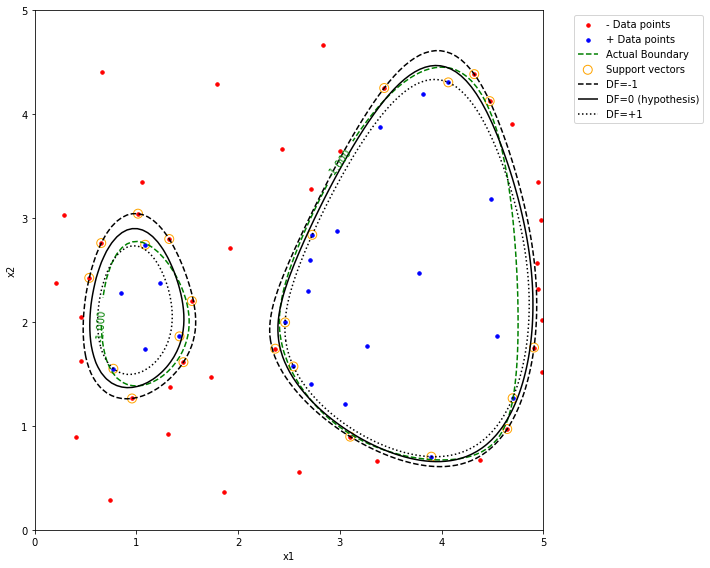

 The best solution found:                                                                           
 [4.70338064 3.35467365]

 Objective function:
 -0.24277571179416396


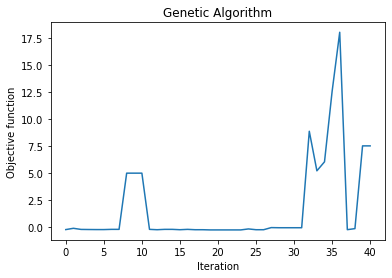

 The best solution found:                                                                           
 [2.51093918 2.44936241]

 Objective function:
 -0.23141851332318758


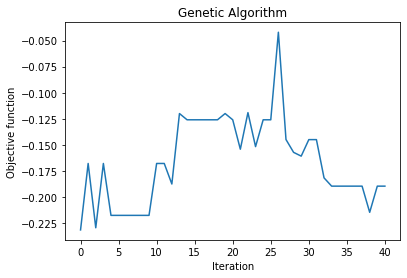

 The best solution found:                                                                           
 [3.80496363 4.44696495]

 Objective function:
 -0.25701375217868394


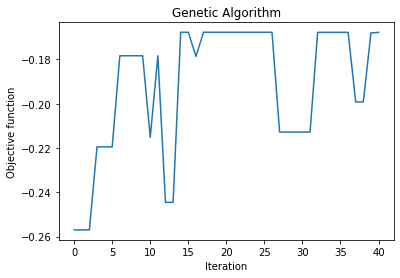

 The best solution found:                                                                           
 [1.3431068  2.56260441]

 Objective function:
 -0.21693832650046468


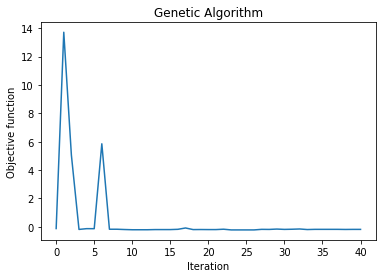

 The best solution found:                                                                           
 [4.62616762 3.59993226]

 Objective function:
 -0.2571257241003472


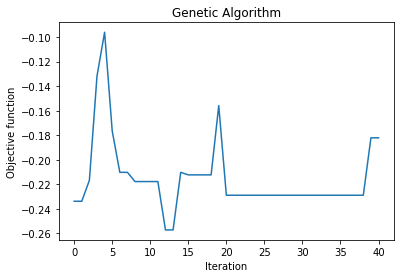

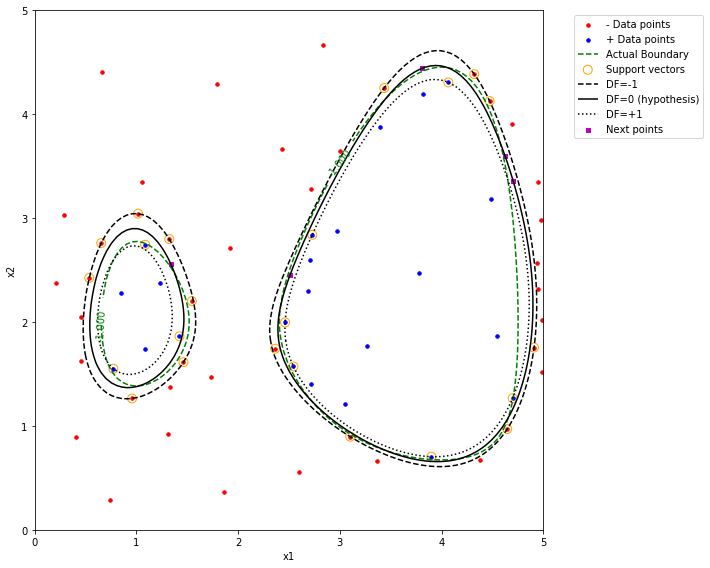

Hypothesis change estimate:  [1.7999999999999998] %
Current Accuracy estimate:  [97.92] %


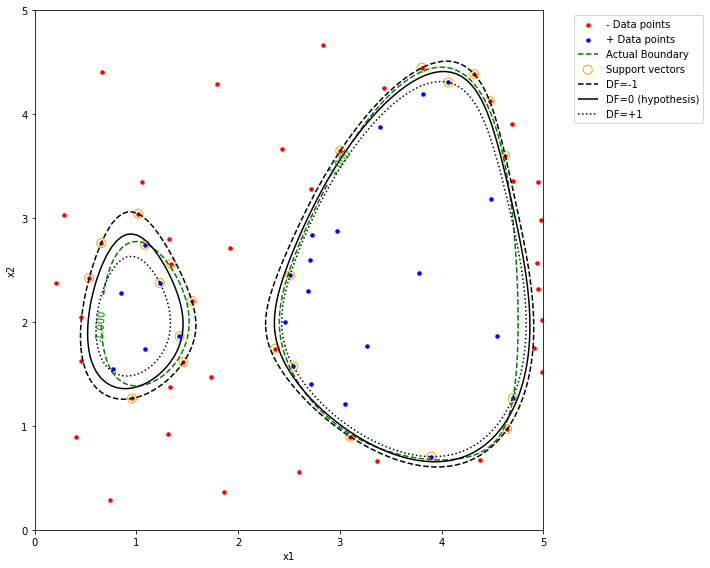

 The best solution found:                                                                           
 [3.63317911 4.26219349]

 Objective function:
 -0.19719210287051425


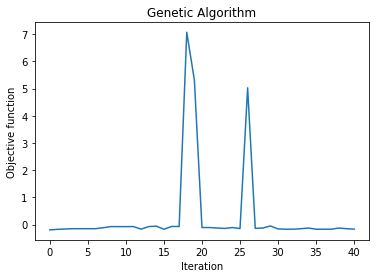

 The best solution found:                                                                           
 [3.61213813 0.70183658]

 Objective function:
 -0.2473058725400025


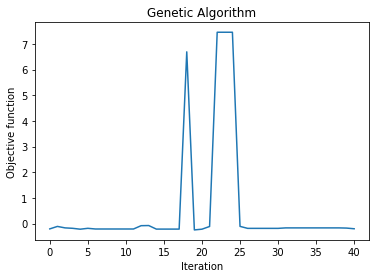

 The best solution found:                                                                           
 [4.72067887 3.01627494]

 Objective function:
 -0.26284083139062675


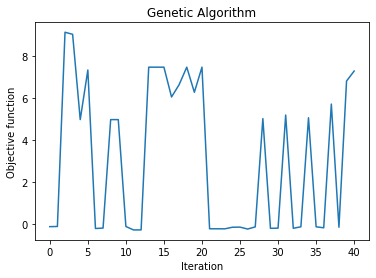

 The best solution found:                                                                           
 [2.76334006 1.21258314]

 Objective function:
 -0.1987945880895105


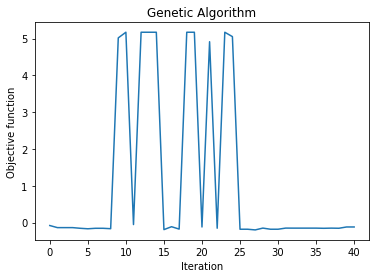

 The best solution found:                                                                           
 [0.88233792 2.8452347 ]

 Objective function:
 -0.22853386718581303


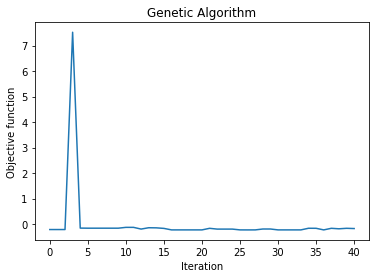

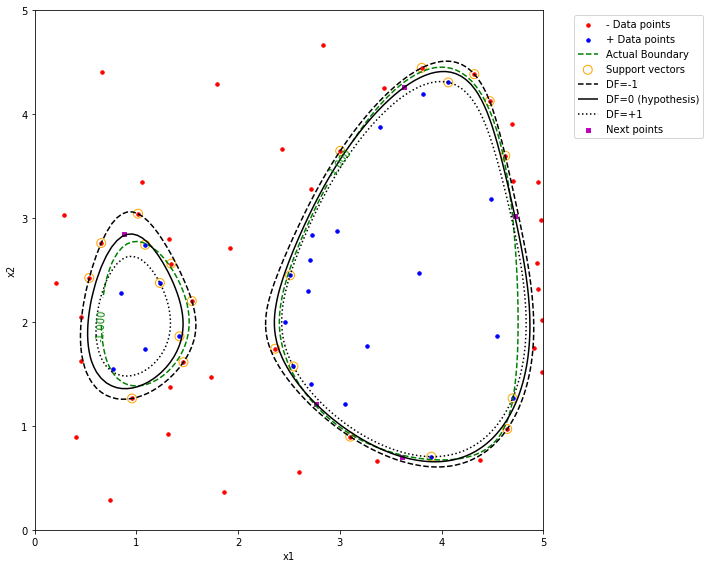

Hypothesis change estimate:  [1.3599999999999999] %
Current Accuracy estimate:  [98.0] %


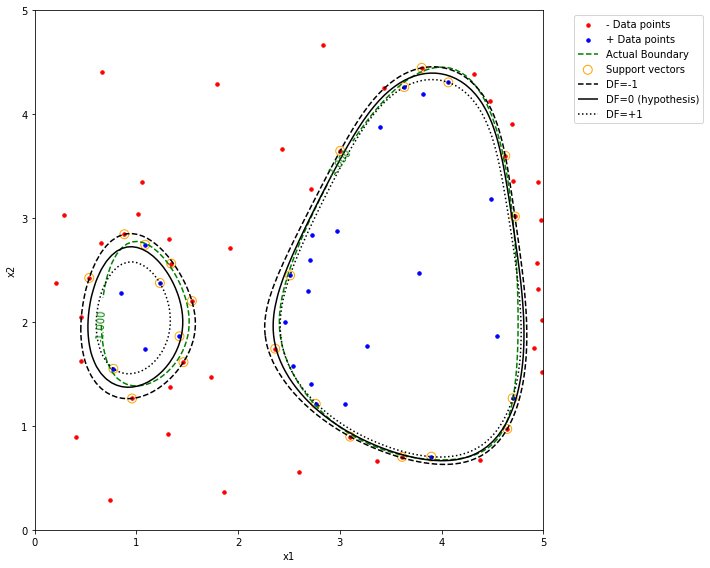

 The best solution found:                                                                           
 [4.73601708 2.7100471 ]

 Objective function:
 -0.24954978764365932


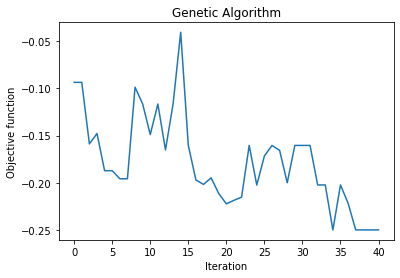

 The best solution found:                                                                           
 [1.10169371 1.42135438]

 Objective function:
 -0.21338810698039046


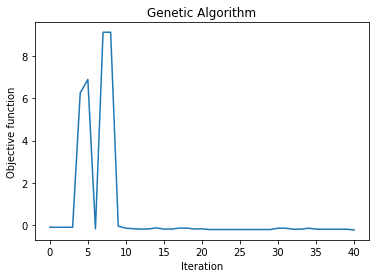

 The best solution found:                                                                           
 [2.38372028 2.22005686]

 Objective function:
 -0.23688176494498978


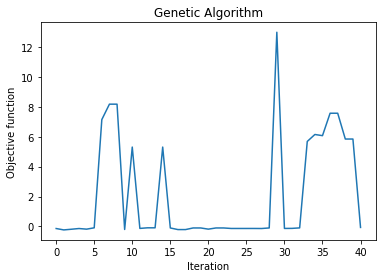

 The best solution found:                                                                           
 [0.55299837 2.22240607]

 Objective function:
 -0.19597698278382644


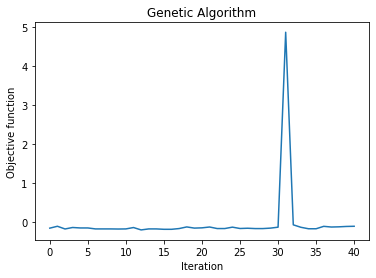

 The best solution found:                                                                           
 [0.69905702 2.57088832]

 Objective function:
 -0.19462169924259717


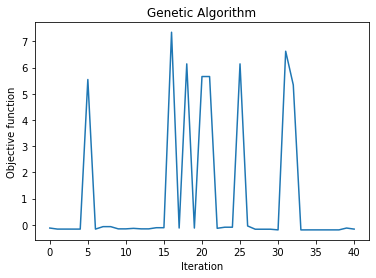

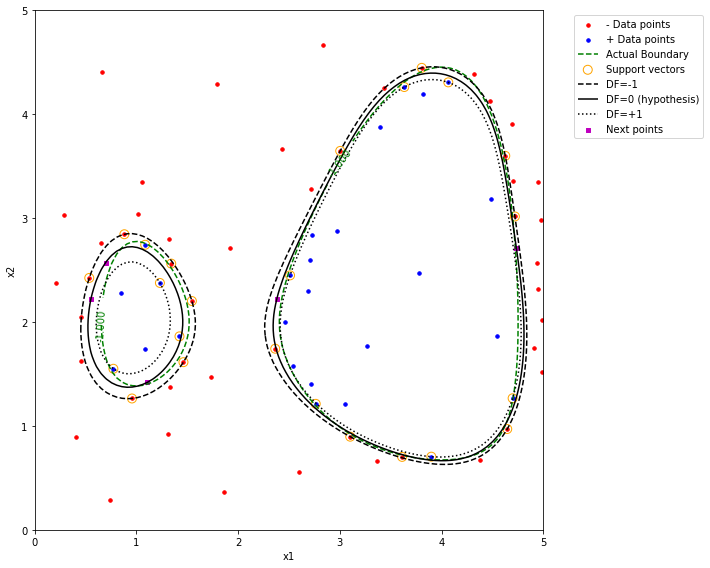

Hypothesis change estimate:  [0.72] %
Current Accuracy estimate:  [98.48] %


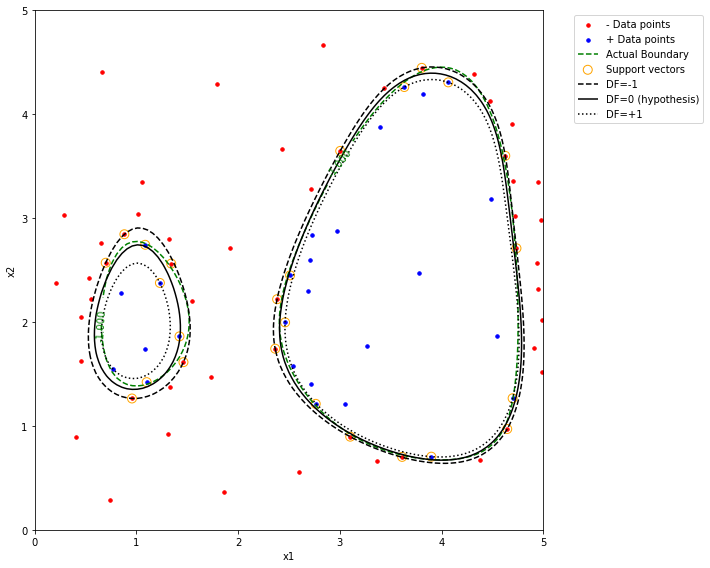

 The best solution found:                                                                           
 [4.7735131  2.09872801]

 Objective function:
 -0.22783711694357844


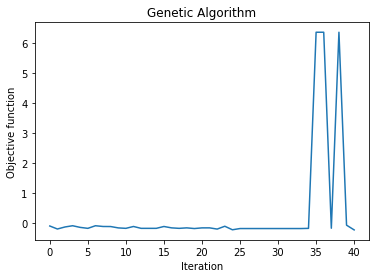

 The best solution found:                                                                           
 [0.87433457 2.66885939]

 Objective function:
 -0.17655679432473764


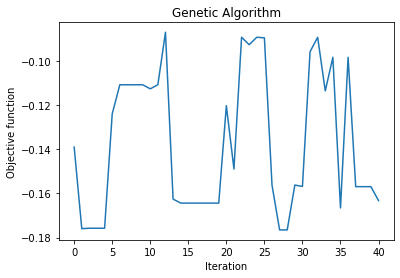

 The best solution found:                                                                           
 [1.42375093 2.07708327]

 Objective function:
 -0.17509835366469842


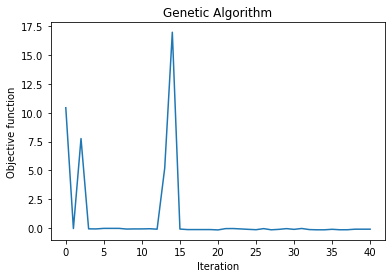

 The best solution found:                                                                           
 [1.37979914 2.27220197]

 Objective function:
 -0.18013413591144


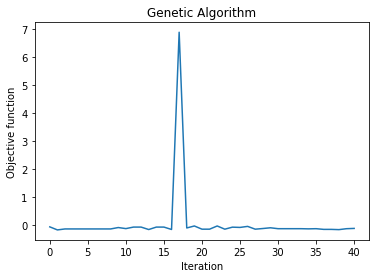

 The best solution found:                                                                           
 [3.25295914 3.9667595 ]

 Objective function:
 -0.16554739305198687


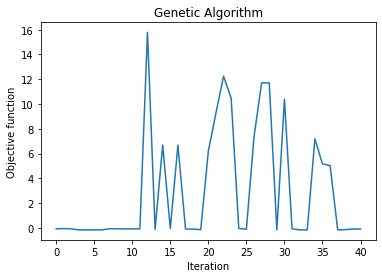

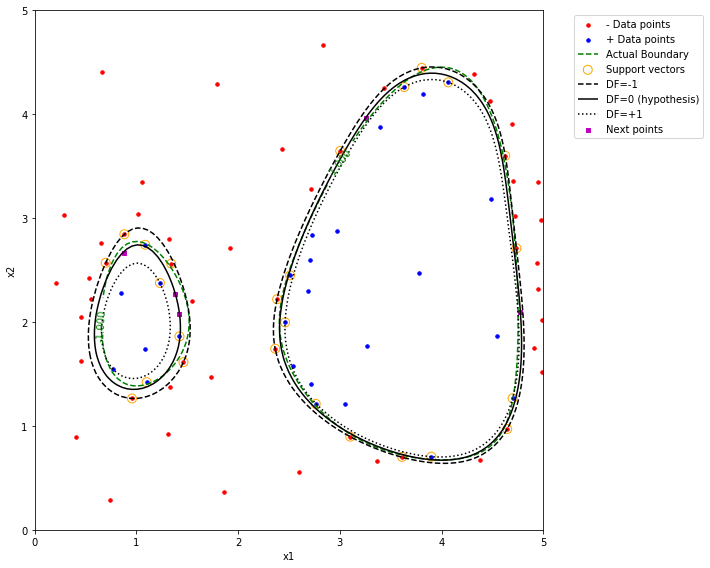

Hypothesis change estimate:  [0.9199999999999999] %
Current Accuracy estimate:  [99.08] %


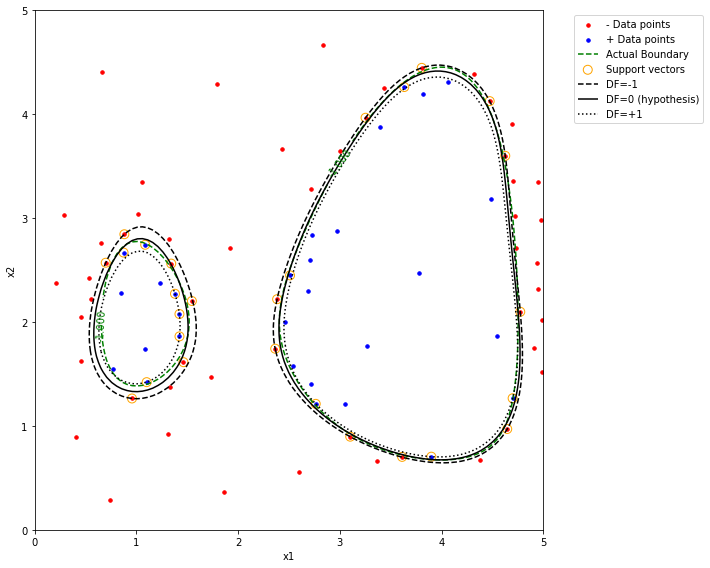

 The best solution found:                                                                           
 [4.76794683 1.58660344]

 Objective function:
 -0.21889041260690148


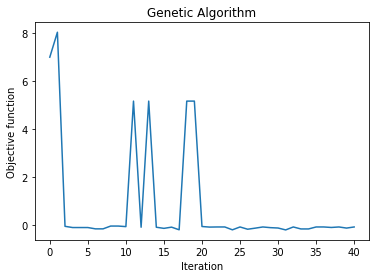

 The best solution found:                                                                           
 [0.58958725 1.78143394]

 Objective function:
 -0.2018524424072996


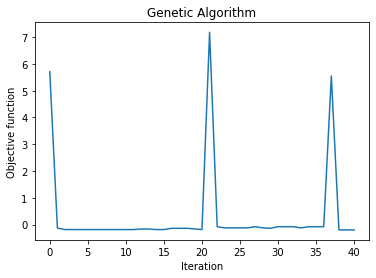

 The best solution found:                                                                           
 [4.70945834 2.51303867]

 Objective function:
 -0.19879056398108938


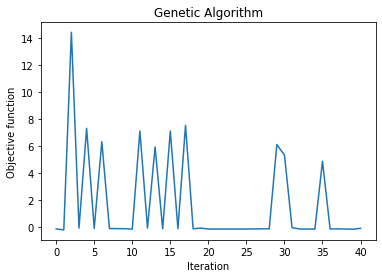

 The best solution found:                                                                           
 [4.72555186 2.35554263]

 Objective function:
 -0.15831615392121945


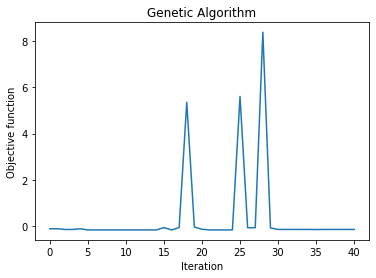

 The best solution found:                                                                           
 [3.30939303 0.82480194]

 Objective function:
 -0.17384990691479166


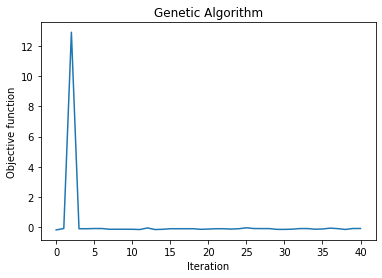

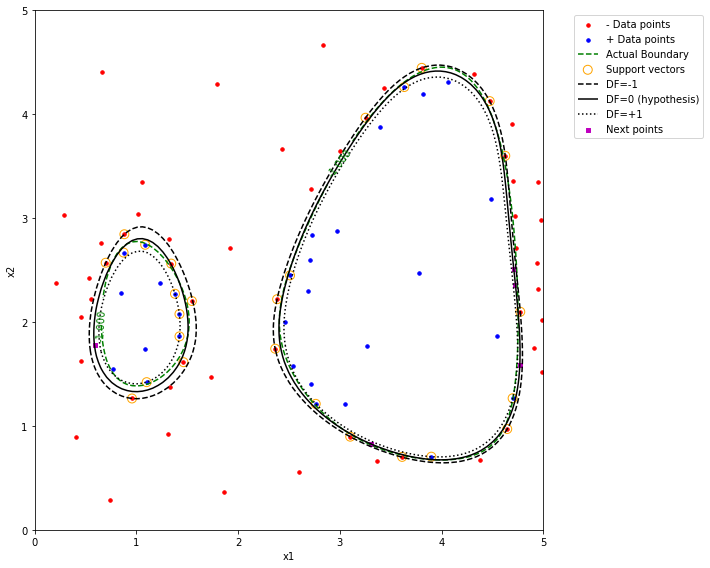

Hypothesis change estimate:  [0.76] %
Current Accuracy estimate:  [99.2] %


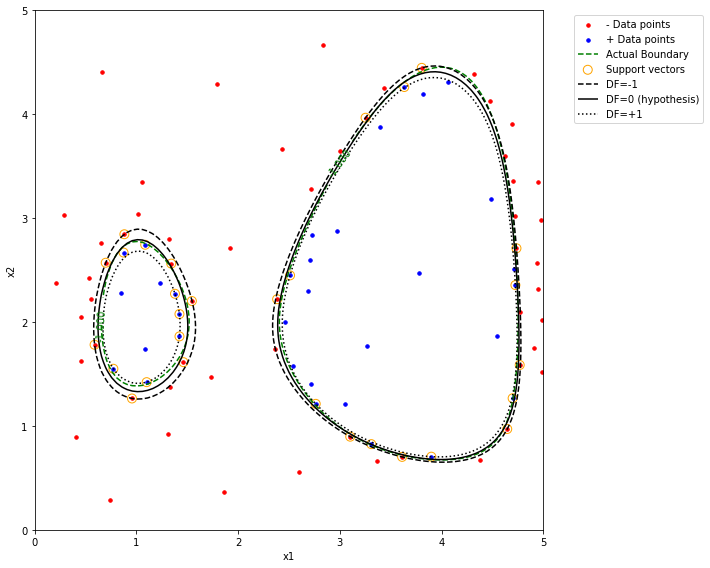

 The best solution found:                                                                           
 [0.62442605 2.01636313]

 Objective function:
 -0.17391385250437055


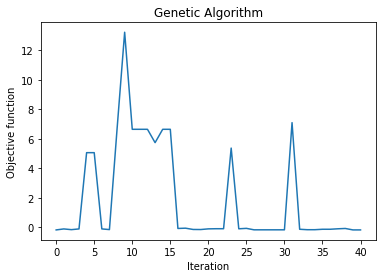

 The best solution found:                                                                           
 [2.96457653 1.00737151]

 Objective function:
 -0.1767742607646929


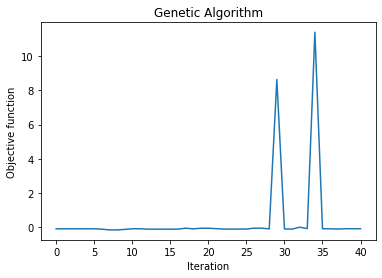

 The best solution found:                                                                           
 [2.91361533 3.39549397]

 Objective function:
 -0.22427885439345355


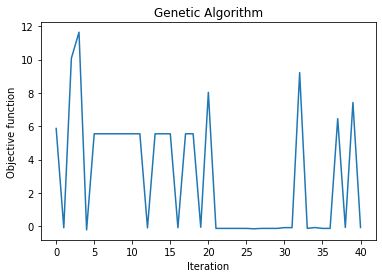

 The best solution found:                                                                           
 [4.1080755 0.6822044]

 Objective function:
 -0.20962071176416683


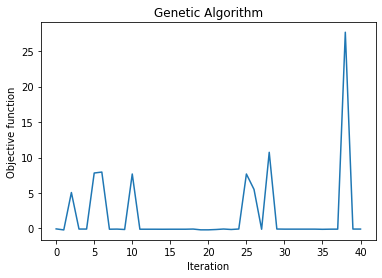

 The best solution found:                                                                           
 [0.6927855  2.39987353]

 Objective function:
 -0.15740048992586714


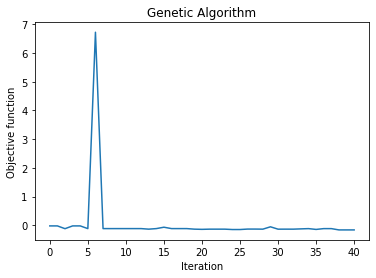

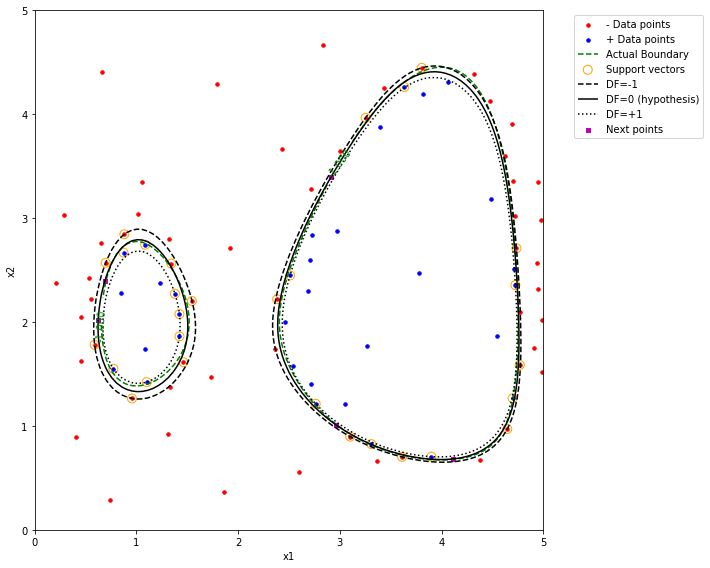

Hypothesis change estimate:  [0.6] %
Current Accuracy estimate:  [98.83999999999999] %


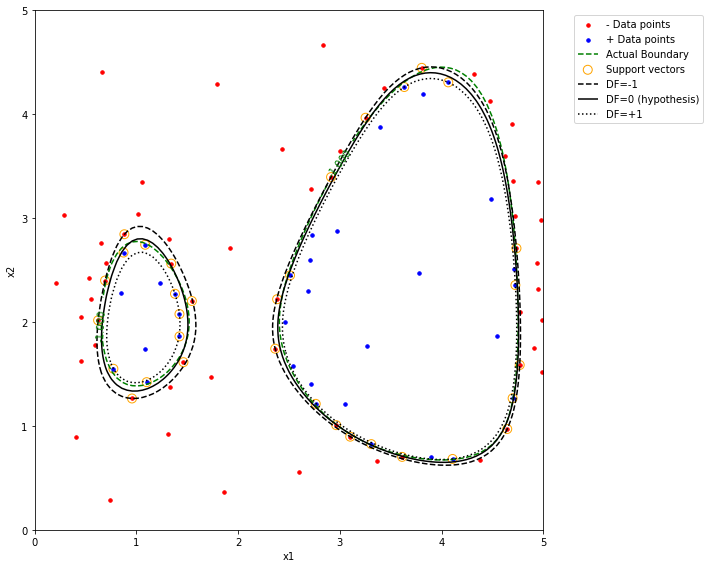

 The best solution found:                                                                           
 [2.82422589 3.16866191]

 Objective function:
 -0.15488982019203354


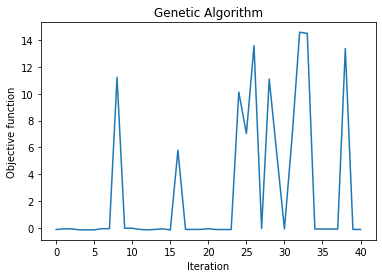

 The best solution found:                                                                           
 [0.81976368 1.38447842]

 Objective function:
 -0.1718751112807038


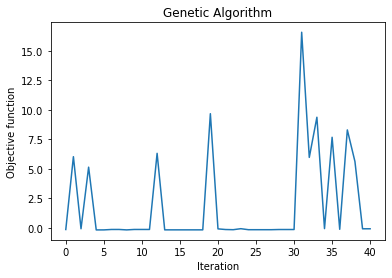

 The best solution found:                                                                           
 [4.46978205 0.79128777]

 Objective function:
 -0.15408022835499477


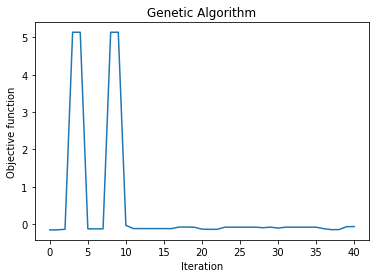

 The best solution found:                                                                           
 [4.47679708 3.87891628]

 Objective function:
 -0.21851865969399908


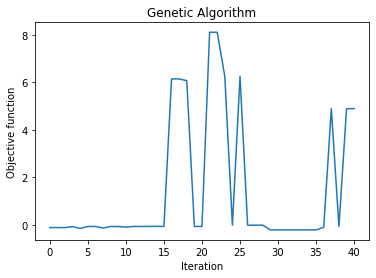

 The best solution found:                                                                           
 [2.73562533 2.99517171]

 Objective function:
 -0.15557747845868014


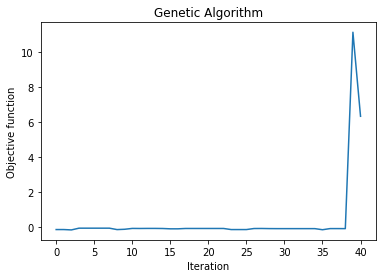

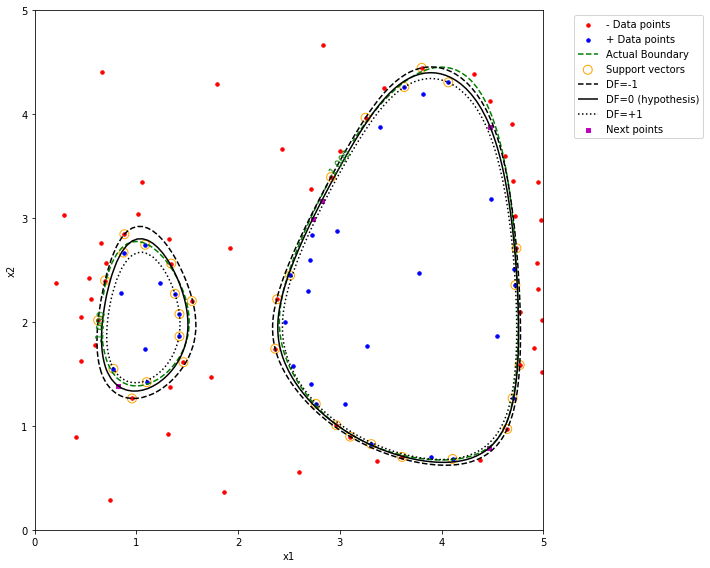

Hypothesis change estimate:  [0.24] %
Current Accuracy estimate:  [99.08] %


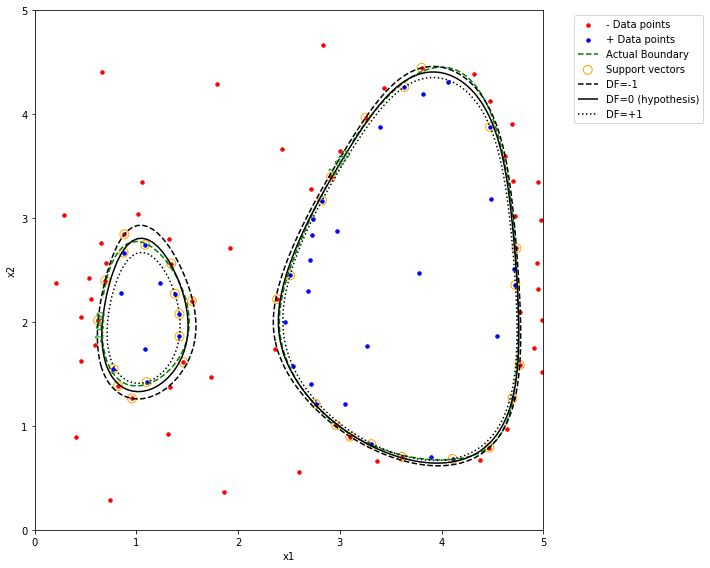

In [9]:
optimizer = gaSolver(space = mySpace, epsilon = epsilon, batchSize = batchSize)
changeMeasure = [mySpace.getChangeMeasure(percent = True, updateConvLabels=True)]
print('Hypothesis change estimate: ', changeMeasure[0] , '%')
sampleNumbers = [len(mySpace.samples)]
while currentBudget > 0:
    newPointsFound = optimizer.findNextPoints(min(currentBudget, batchSize))
    currentBudget -= min(currentBudget, batchSize)
    sInfo.fileName = f'{figFolder}/bdgt_{currentBudget}_NotLabeled'
    plotSpace(mySpace,figsize = (10,8), legend = True, newPoint = newPointsFound, saveInfo=sInfo, showPlot=True)
    mySpace.addPointsToSampleList(newPointsFound)
    mySpace.getBenchmarkLabels()
    mySpace.fit_classifier()
    changeMeasure.append(mySpace.getChangeMeasure(percent = True, updateConvLabels=True))
    acc.append(mySpace.getAccuracyMeasure(percent = True))
    print('Hypothesis change estimate: ', changeMeasure[-1:], '%')
    print('Current Accuracy estimate: ',acc[-1:],'%')
    sampleNumbers.append(len(mySpace.samples))
    sInfo.fileName = f'{figFolder}/bdgt_{currentBudget}_Labeled'
    plotSpace(mySpace,figsize = (10,8), legend = True, newPoint = None, saveInfo=sInfo, showPlot=True)

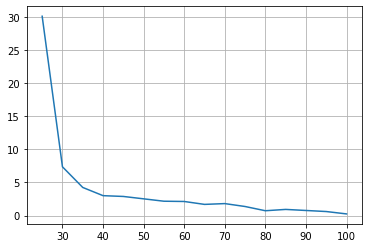

In [10]:
plt.plot(sampleNumbers, changeMeasure)
plt.grid(True)

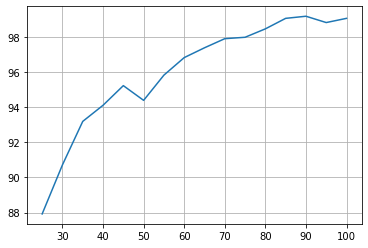

In [11]:
plt.plot(sampleNumbers, acc)
plt.grid(True)
